In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense,Conv1D,MaxPooling1D,UpSampling1D,Flatten,add
from tensorflow.keras.callbacks import ModelCheckpoint

from AD_tools import * # specifically need training()

In [2]:
plt.rcParams.update({
    'figure.figsize': (6,5),
    'font.size': 16,
    })

In [3]:
name = "1-0"

In [4]:
data = np.loadtxt("data/dataD6weights030rand.txt")
data.shape

(1005, 27)

In [5]:
xx, yy = data[:,0], data[:,1]

In [6]:
sorter = np.argsort(xx)
xx, yy = xx[sorter], yy[sorter]

In [7]:
x_data = data[:,3:][sorter]

In [8]:
x_data.shape

(1005, 24)

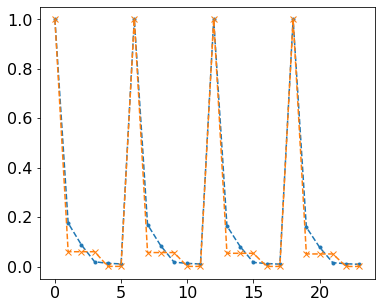

In [9]:
plt.plot(x_data[0],".--")
plt.plot(x_data[-1],"x--")

In [10]:
x_test = x_data.reshape((x_data.shape[0],4,6)).transpose((0,2,1))
x_test.shape

(1005, 6, 4)

In [11]:
shape_ = x_test.shape[1:]

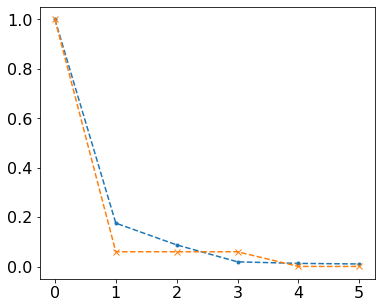

In [12]:
plt.plot(x_test[0,:,0],".--")
plt.plot(x_test[-1,:,0],"x--")

In [13]:
def picker(fillings, fmin, fmax):
    fillings = np.array(fillings)
    pickle = np.where((fillings>= fmin) & (fillings <= fmax))
    return pickle, fillings[pickle]

In [14]:
rate=0.2 # Dropout percentage
bottleneck = 50 # latent space dimension, does not make great differences
fully = True

In [15]:
def cnnx(loss,optimizer,activation0,activation,x_shape,dim1=(16,(3,)),dim2=(16,(3,)), fully=False):
    """ 
    Pretty Standard Convolutional Autoencoder with a fully-connected latent space
    activation0: Activations "inside" the CAE
    activation: Last activation (important depending on the range of the pixel values)
    """
    in_dim = x_shape
    input_img = Input(shape=in_dim)
   
    #x1 = Conv1D(*dim1, activation=activation0, padding='same')(input_img)
    #x2 = MaxPooling1D((2,), padding='same')(x1)
    #x2 = Conv1D(*dim2, activation=activation0, padding='same')(x2)
    #x3 = MaxPooling1D((2,), padding='same')(x2)
    #encoded = Conv1D(*dim2, activation=activation0, padding='same')(x2)
    
    encoded = Flatten()(input_img)
    encoded = Dense(units=100,activation=activation0)(encoded)
    encoded = tf.keras.layers.Dropout(rate)(encoded)
    encoded = Dense(units=25,activation=activation0)(encoded)
    
    y = Dense(units=100,activation=activation0)(encoded)
    y = tf.keras.layers.Dropout(rate)(y)

    #y=UpSampling1D(2)(encoded)
    #y=Conv1D(*dim1, activation=activation0, padding='same')(y)
    #y=UpSampling1D(2)(y)
    decoded = Dense(np.prod(in_dim), activation=activation)(y)
    decoded = tf.keras.layers.Reshape(in_dim)(decoded)
    

    cnn = Model(input_img, decoded)
    cnn.compile(loss=loss,optimizer=optimizer)
    return cnn

In [16]:
# Show Network architecture
cnn = cnnx("mse","adam","linear","relu",x_shape=(10,4))
cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 4)]           0         
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0     

In [17]:
def create_out(cnn1):
    """
    Creates (dim_freq, dim_phase) matrix of the output loss and the standard deviation
    """
    y_test = cnn1.predict(x_test)
    return 100*eval_loss(x_test,y_test,norm=norm2)/eval_loss(x_test,0*x_test,norm=norm2)

In [18]:
train1s = [(0,0.3),(3.3,np.max(xx)),(1.4,1.8)]

# Training

In [19]:
cnns = [None]*len(train1s)
outs = [None]*len(train1s)

Epoch 1/100
5/5 [==============================] - 1s 81ms/step - loss: 0.1768 - val_loss: 0.1512
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 0.1438 - val_loss: 0.1176
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 0.1157 - val_loss: 0.0811
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0780 - val_loss: 0.0439
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0438 - val_loss: 0.0132
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0251 - val_loss: 0.0015
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0265 - val_loss: 0.0016
Epoch 8/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0280 - val_loss: 0.0018
Epoch 9/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0193 - val_loss: 0.0039
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0192 - val_loss: 0.0047
Epoch 11/100
5/5 [=

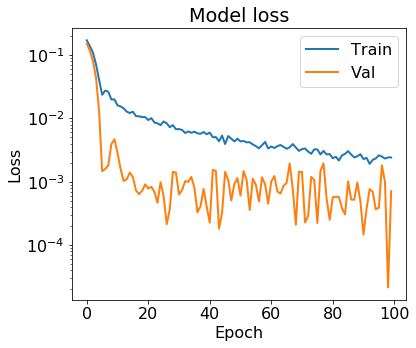

Epoch 1/100
12/12 [==============================] - 0s 13ms/step - loss: 0.1686 - val_loss: 0.1170
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1000 - val_loss: 0.0304
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0378 - val_loss: 0.0022
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0218 - val_loss: 0.0046
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0021
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0141 - val_loss: 0.0011
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0114 - val_loss: 0.0011
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 8.1655e-04
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 5.9830e-04
Epoch 10/100
12/12 [==============================] - 0s 13ms/step - loss: 0.0080 - val_loss: 4.0147

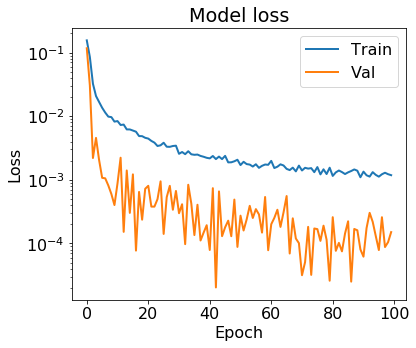

Epoch 1/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1836 - val_loss: 0.1553
Epoch 2/100
7/7 [==============================] - 0s 21ms/step - loss: 0.1497 - val_loss: 0.1274
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.1204 - val_loss: 0.0829
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0732 - val_loss: 0.0300
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0338 - val_loss: 0.0022
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0228 - val_loss: 9.6948e-04
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0223 - val_loss: 0.0032
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0171 - val_loss: 0.0042
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0152 - val_loss: 0.0016
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0145 - val_loss: 6.3408e-04
Epoch 11/100
7/7 [=

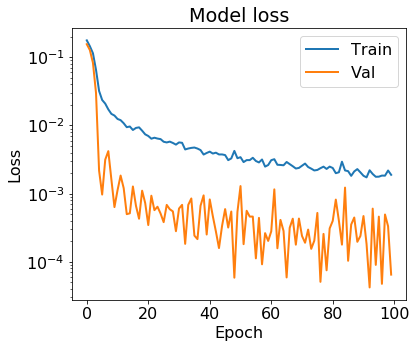

In [20]:
for i,train1 in enumerate(train1s):
    pickle, xx_train = picker(xx,*train1)
    x_train = x_test[pickle]
    cnns[i] = training(x_train = x_train,choose_cnn = cnnx, name = name, provide_cnn = False,
                 load_prev= False, num_epochs = 100,  verbose_val=1, batch_size = 16, shuffle=True, early=False,
                 loss="mse", activation0 = 'relu', activation = 'linear', optimizer = "adam",
                 dim1=(16,(3,)), dim2=(16,(3,)), x_shape = shape_)
    outs[i] = create_out(cnns[i])

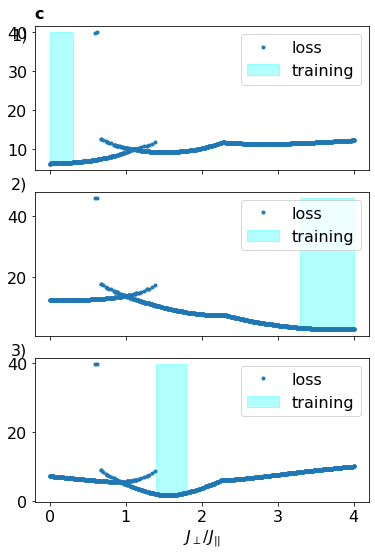

In [21]:
fig, axs = plt.subplots(nrows=3,figsize=(5.5,8),sharex=True)
for i,train1 in enumerate(train1s):
    ax = axs[i]
    out = outs[i]
    ax.plot(xx,out,".",label="loss")
    #ax.set_ylabel("loss (%)")
    ax.fill_between(*[train1],out.min(),out.max(),alpha=0.3,color="cyan", label="training")
    ax.legend()
    #ax.set_ylim(0.9*np.min(out), 25)
axs[-1].set_xlabel("$J_\perp/J_{{||}}$")
axs[0].text(0,1.05,'c',weight="bold", transform = axs[0].transAxes)
axs[0].text(-0.07,0.9,"1)", transform = axs[0].transAxes)
plt.tight_layout()
for i in range(1,3):
    axs[i].text(-0.07,1.02,str(i+1) + ")", transform = axs[i].transAxes)


plt.savefig("plots/" + name + ".png")
plt.savefig("plots/" + name + ".pdf")

In [22]:
np.savez("data_results/" + name + "_data", outs = outs, xx = xx, train1s = train1s)

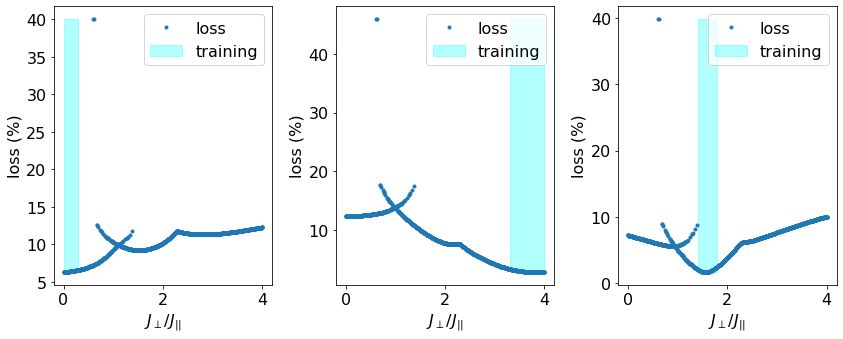

In [23]:
fig, axs = plt.subplots(ncols=3,figsize=(12,5))
for i,train1 in enumerate(train1s):
    ax = axs[i]
    out = outs[i]
    ax.plot(xx,out,".",label="loss")
    ax.set_ylabel("loss (%)")
    ax.set_xlabel("$J_\perp/J_{{||}}$")
    ax.fill_between(*[train1],out.min(),out.max(),alpha=0.3,color="cyan", label="training")
    ax.legend()
    plt.tight_layout()
    
plt.tight_layout()


# ConvFully model
This part was not explicitly shon in the paper but merely mentioned. We test a variety of different kinds of model architectures and find qualitatively very similar results.

In [24]:
rate = 0.1

In [25]:
def ConvFully(loss,optimizer,activation0,activation,x_shape,dim1=(16,(3,)),dim2=(16,(3,)), fully=False):
    """ 
    Pretty Standard Convolutional Autoencoder with a fully-connected latent space
    activation0: Activations "inside" the CAE
    activation: Last activation (important depending on the range of the pixel values)
    """
    in_dim = x_shape
    input_img = Input(shape=in_dim)
   
    x1 = Conv1D(*dim1, activation=activation0, padding='same')(input_img)
    x2 = MaxPooling1D((2,), padding='same')(x1)
    #x2 = Conv1D(*dim2, activation=activation0, padding='same')(x2)
    #x3 = MaxPooling1D((2,), padding='same')(x2)
    encoded = Conv1D(*dim2, activation=activation0, padding='same')(x2)
    
    encoded = Flatten()(encoded)
    encoded = Dense(units=5,activation=activation0)(encoded)
    encoded = tf.keras.layers.Dropout(rate)(encoded)
    encoded = Dense(dim2[0]*x_shape[0]//2,activation=activation0)(encoded)
    encoded = tf.keras.layers.Dropout(rate)(encoded)
    encoded = tf.keras.layers.Reshape((x_shape[0]//2,dim2[0]))(encoded)

    y=UpSampling1D(2)(encoded)
    #y=Conv1D(*dim1, activation=activation0, padding='same')(y)
    #y=UpSampling1D(2)(y)
    decoded = Conv1D(x_shape[-1], dim1[1], activation=activation, padding='same')(y)

    cnn = Model(input_img, decoded)
    cnn.compile(loss=loss,optimizer=optimizer)
    return cnn

In [26]:
train1s = [(0,0.3),(3.3,np.max(xx)),(1.4,1.8)]

In [27]:
cnns = [None]*len(train1s)
outs = [None]*len(train1s)

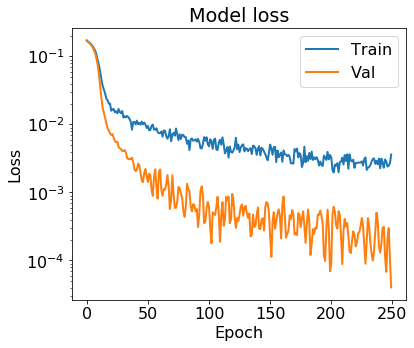

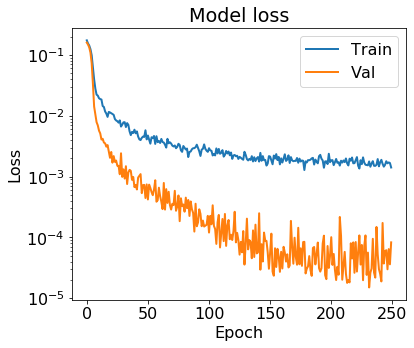

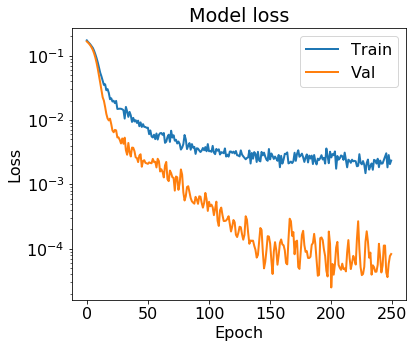

In [28]:
for i,train1 in enumerate(train1s):
    tf.keras.backend.clear_session()
    pickle, xx_train = picker(xx,*train1)
    x_train = x_test[pickle]
    cnns[i] = training(x_train = x_train,choose_cnn = ConvFully, name = name, provide_cnn = False,
                 load_prev= False, num_epochs = 250,  verbose_val=0, batch_size = 16, shuffle=True, early=False,
                 loss="mse", activation0 = 'relu', activation = 'linear', optimizer = "adam",
                 dim1=(16,(3,)), dim2=(16,(3,)), x_shape = shape_)
    outs[i] = create_out(cnns[i])

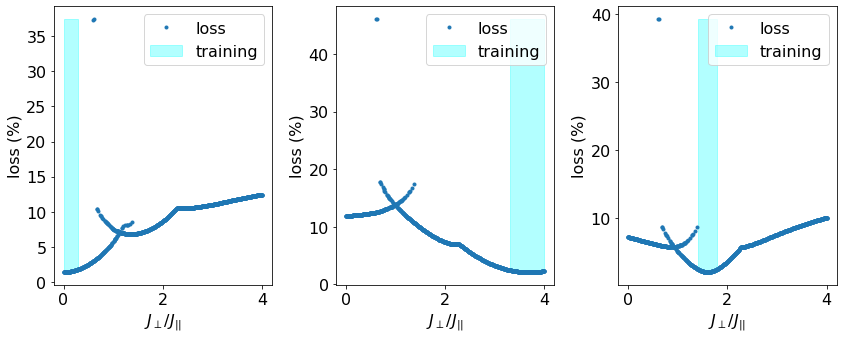

In [29]:
fig, axs = plt.subplots(ncols=3,figsize=(12,5))
for i,train1 in enumerate(train1s):
    ax = axs[i]
    out = outs[i]
    ax.plot(xx,out,".",label="loss")
    ax.set_ylabel("loss (%)")
    ax.set_xlabel("$J_\perp/J_{{||}}$")
    ax.fill_between(*[train1],out.min(),out.max(),alpha=0.3,color="cyan", label="training")
    ax.legend()
    plt.tight_layout()
    
plt.tight_layout()
plt.savefig("plots/" + name + "ConvFully.png")

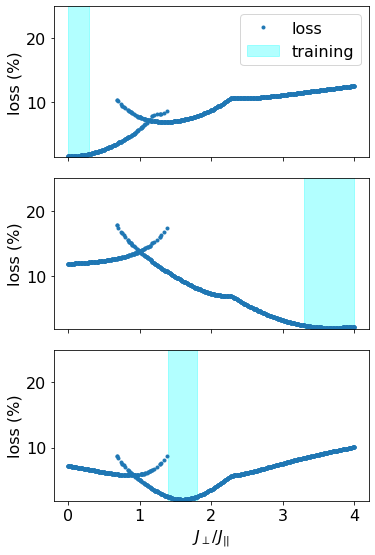

In [30]:
fig, axs = plt.subplots(nrows=3,figsize=(5.5,8),sharex=True)
for i,train1 in enumerate(train1s):
    ax = axs[i]
    out = outs[i]
    ax.plot(xx,out,".",label="loss")
    ax.set_ylabel("loss (%)")
    ax.fill_between(*[train1],out.min(),out.max(),alpha=0.3,color="cyan", label="training")
    ax.set_ylim(0.9*np.min(out), 25)
axs[0].legend()
axs[-1].set_xlabel("$J_\perp/J_{{||}}$")
plt.tight_layout()

plt.savefig("plots/" + name + "ConvFully2.png")

# Conv model
The following was not explicitly shown in the paper, but merely mentioned. We test a variety of architectures and find qualitative very similar results. We therefore resort to using simple fully connected autoencoders as it is the simplest way.

In [31]:
def cnn(loss,optimizer,activation0,activation,x_shape,dim1=(16,(3,)),dim2=(16,(3,)), fully=False):
    """ 
    Pretty Standard Convolutional Autoencoder with a fully-connected latent space
    activation0: Activations "inside" the CAE
    activation: Last activation (important depending on the range of the pixel values)
    """
    in_dim = x_shape
    input_img = Input(shape=in_dim)
   
    x1 = Conv1D(*dim1, activation=activation0, padding='same')(input_img)
    x2 = MaxPooling1D((2,), padding='same')(x1)
    #x2 = Conv1D(*dim2, activation=activation0, padding='same')(x2)
    #x3 = MaxPooling1D((2,), padding='same')(x2)
    encoded = Conv1D(*dim2, activation=activation0, padding='same')(x2)

    y=UpSampling1D(2)(encoded)
    #y=Conv1D(*dim1, activation=activation0, padding='same')(y)
    #y=UpSampling1D(2)(y)
    decoded = Conv1D(x_shape[-1], dim1[1], activation=activation, padding='same')(y)

    cnn = Model(input_img, decoded)
    cnn.compile(loss=loss,optimizer=optimizer)
    return cnn

In [32]:
train1s = [(0,0.3),(3.3,np.max(xx)),(1.4,1.8)]

In [33]:
cnns = [None]*len(train1s)
outs = [None]*len(train1s)

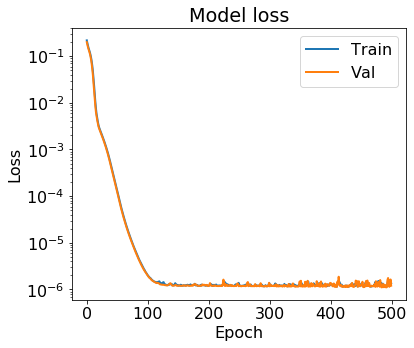

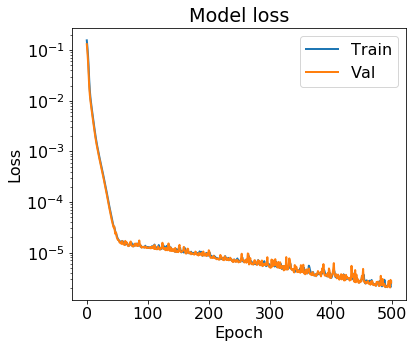

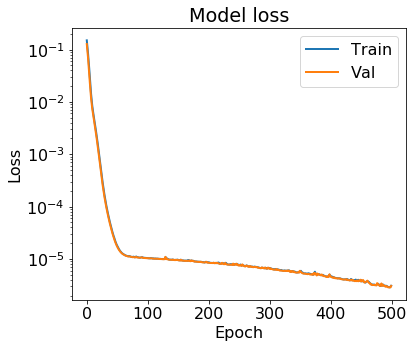

In [34]:
for i,train1 in enumerate(train1s):
    tf.keras.backend.clear_session()
    pickle, xx_train = picker(xx,*train1)
    x_train = x_test[pickle]
    cnns[i] = training(x_train = x_train,choose_cnn = cnn, name = name, provide_cnn = False,
                 load_prev= False, num_epochs = 500,  verbose_val=0, batch_size = 16, shuffle=True, early=False,
                 loss="mse", activation0 = 'relu', activation = 'linear', optimizer = "adam",
                 dim1=(16,(3,)), dim2=(16,(3,)), x_shape = shape_)
    outs[i] = create_out(cnns[i])

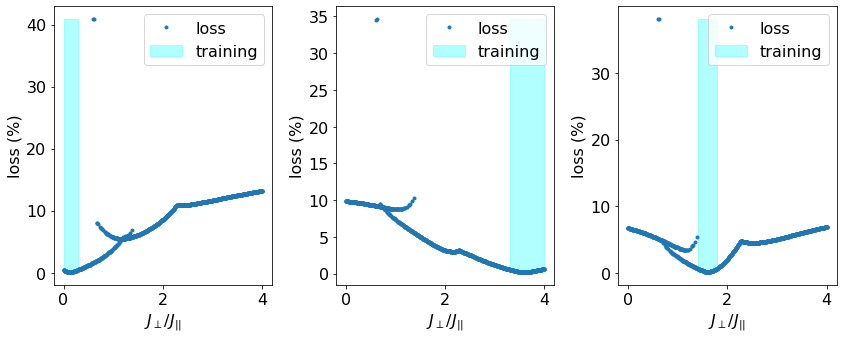

In [35]:
fig, axs = plt.subplots(ncols=3,figsize=(12,5))
for i,train1 in enumerate(train1s):
    ax = axs[i]
    out = outs[i]
    ax.plot(xx,out,".",label="loss")
    ax.set_ylabel("loss (%)")
    ax.set_xlabel("$J_\perp/J_{{||}}$")
    ax.fill_between(*[train1],out.min(),out.max(),alpha=0.3,color="cyan", label="training")
    ax.legend()
    plt.tight_layout()
    
plt.tight_layout()
plt.savefig("plots/" + name + "Conv.png")

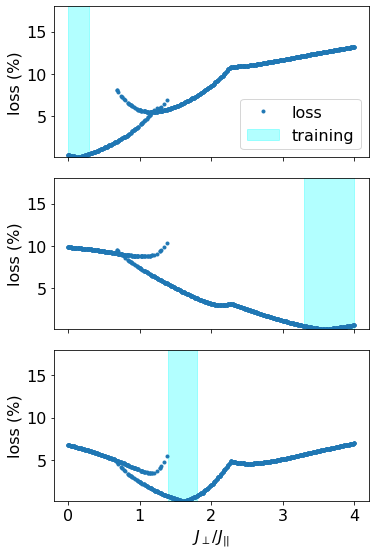

In [36]:
fig, axs = plt.subplots(nrows=3,figsize=(5.5,8),sharex=True)
for i,train1 in enumerate(train1s):
    ax = axs[i]
    out = outs[i]
    ax.plot(xx,out,".",label="loss")
    ax.set_ylabel("loss (%)")
    ax.fill_between(*[train1],out.min(),out.max(),alpha=0.3,color="cyan", label="training")
    ax.set_ylim(0.9*np.min(out), 18)
axs[0].legend()
axs[-1].set_xlabel("$J_\perp/J_{{||}}$")
plt.tight_layout()

plt.savefig("plots/" + name + "Conv2.png")